# Euclid école d'été Rodolphe Clédassou

## TD weak lensing cycle 2

2023

Martin Kilbinger <martin.kilbinger@cea.fr>

## Prerequisites

### Data
Download the galaxy catalogue "final_cat.npy" (binary numpy array).

Size: 2.8 Gb

Content: Shear and calibration information of galaxies in the UNIONS/CFIS W3 field.

### Libraries

numpy, astropy, matplotlib, scipy, treecorr

In [1]:
# Load some libraries
import sys
import os

import numpy as np
from astropy.io import fits
import matplotlib.pylab as plt

%matplotlib inline

# Set-up

In [2]:
# Load catalogue with all objects (detected on stacks/tiles)

# On machines with small RAM open with memory mapped on disk
mmap_mode = "r"

# With large RAM no memory mapping is necessary
# mmap_mode = None

dd = np.load("final_cat_small.npy", mmap_mode=mmap_mode)

In [3]:
# Print the column names
print(dd.dtype.names)

('XWIN_WORLD', 'YWIN_WORLD', 'TILE_ID', 'FLAGS', 'IMAFLAGS_ISO', 'NGMIX_MCAL_FLAGS', 'NGMIX_ELL_PSFo_NOSHEAR', 'SPREAD_CLASS', 'SPREAD_MODEL', 'SPREADERR_MODEL', 'N_EPOCH', 'NGMIX_N_EPOCH', 'NGMIX_ELL_1M', 'NGMIX_ELL_1P', 'NGMIX_ELL_2M', 'NGMIX_ELL_2P', 'NGMIX_ELL_NOSHEAR', 'NGMIX_ELL_ERR_NOSHEAR', 'NGMIX_FLAGS_1M', 'NGMIX_FLAGS_1P', 'NGMIX_FLAGS_2M', 'NGMIX_FLAGS_2P', 'NGMIX_FLAGS_NOSHEAR', 'NGMIX_T_1M', 'NGMIX_T_1P', 'NGMIX_T_2M', 'NGMIX_T_2P', 'NGMIX_T_NOSHEAR', 'NGMIX_T_ERR_1M', 'NGMIX_T_ERR_1P', 'NGMIX_T_ERR_2M', 'NGMIX_T_ERR_2P', 'NGMIX_T_ERR_NOSHEAR', 'NGMIX_Tpsf_1M', 'NGMIX_Tpsf_1P', 'NGMIX_Tpsf_2M', 'NGMIX_Tpsf_2P', 'NGMIX_Tpsf_NOSHEAR', 'NGMIX_FLUX_1M', 'NGMIX_FLUX_1P', 'NGMIX_FLUX_2M', 'NGMIX_FLUX_2P', 'NGMIX_FLUX_NOSHEAR', 'NGMIX_FLUX_ERR_1M', 'NGMIX_FLUX_ERR_1P', 'NGMIX_FLUX_ERR_2M', 'NGMIX_FLUX_ERR_2P', 'NGMIX_FLUX_ERR_NOSHEAR', 'FLAG_TILING', 'MAG_AUTO', 'SNR_WIN', 'NGMIX_T_PSFo_NOSHEAR', 'NGMIX_MOM_FAIL')


In [4]:
# Excercise 1.1: Print the number of objects
len(dd)

1126718

## 2. Spatial distribution and selecting galaxies

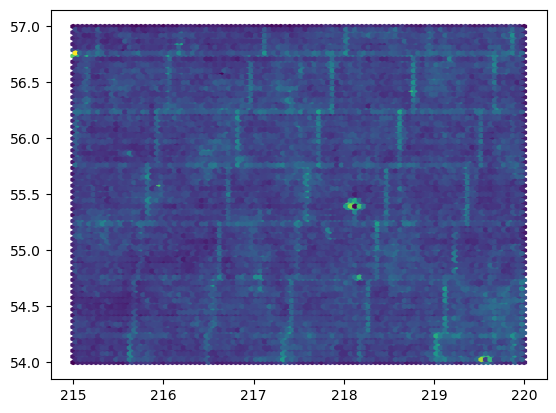

In [7]:
# Exercise 2.1: Look at the distribution of the objects on the sky.

# Plot 2D distribution of all objects use XWIN_WORLD YWIN_WORLD

# You should see some weird patterns and clustered areas

plt.hexbin(dd["XWIN_WORLD"], dd["YWIN_WORLD"])

### Apply cuts and select galaxies

In [9]:
# We need to clean up the sample and remove unwanted objects. The information about those objects
# is in the catalogue. For this we define a mask.

# The following values are those to *keep*.

# remove duplicates on overlapping tiles
# 'FLAG_TILING' = 1 (objects with 'FLAG_TILING' = 0 are duplicates)

# masked objects
# 'FLAG' = 0 (object outside mask, e.g. close to Messier or NGC object, bad CCD region, cosmic ray)
# 'IMAFLAGS_ISO' = 0 (SExtractor unflagged object)

# Exercise 2.2:
# a) Apply the above critera to the input catalogue.
# b) Replot spatial distribution with cleaned sample

mask = (
    (dd['FLAG_TILING'] == 1)
    & (dd['FLAGS'] == 0)
    & (dd['IMAFLAGS_ISO'] == 0)
)
ddm = dd[mask]

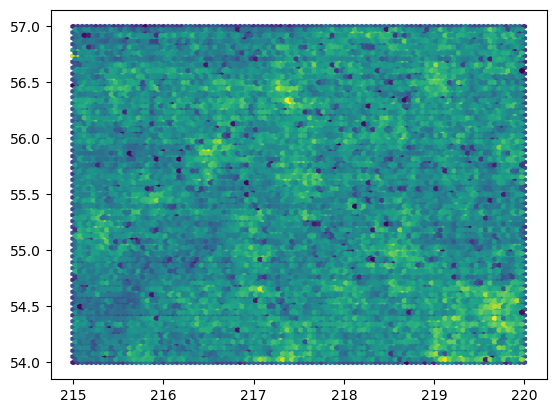

In [10]:
plt.hexbin(ddm["XWIN_WORLD"], ddm["YWIN_WORLD"])

In [16]:
# Some more flags should be applied, for which PSF or shape measurement did not work.

# As before, the following values are those to *keep*.

# 'NGMIX_MCAL_FLAGS' = 0 (shape measurement ngmix did not fail)
# 'NGMIX_ELL_PSFo_NOSHEAR' != -10 (this entry has two components; valid PSF)
# 'NGMIX_MOM_FAIL' = 0 (2nd-order moment measurements with ngmix did not fail)

# 'NGMIX_N_EPOCH' > 1 (use objects with more than one exposure.)
# For this last criterium you can also try > 0 (less conservative) or > 2 (more conservative)

# Exercise 2.3:
# a) Apply the above additional critera to the input catalogue.
# b) Replot spatial distribution with cleaned sample

mask2 = (
    (ddm['NGMIX_MCAL_FLAGS'] == 0)
    & (ddm['NGMIX_ELL_PSFo_NOSHEAR'][:,0] != -10)
    & (ddm['NGMIX_MOM_FAIL'] == 0)
    & (ddm['NGMIX_N_EPOCH'] > 1)
)

ddm2 = ddm[mask2]
len(ddm2)

659116

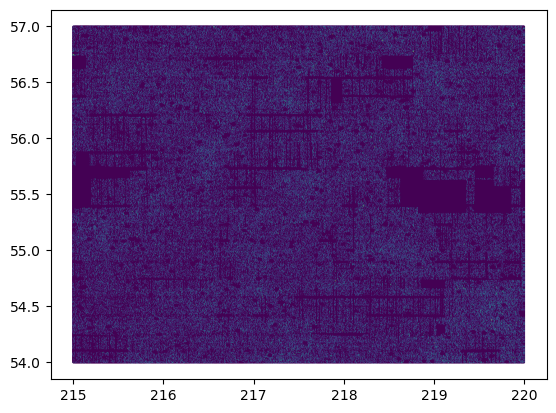

In [31]:
plt.hexbin(ddm2["XWIN_WORLD"], ddm2["YWIN_WORLD"], gridsize=1000)

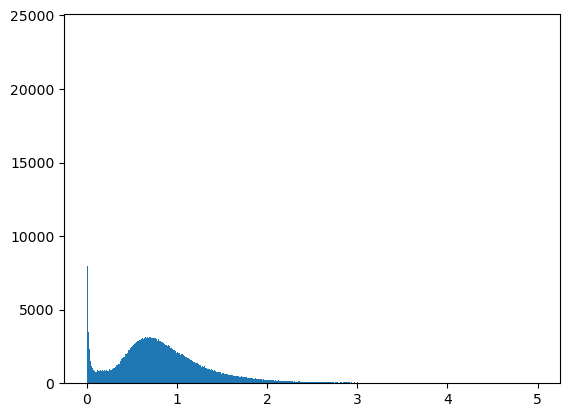

In [27]:
# Select galaxies. We could use SPREADMODEL from SExtractor, but a simpler criterium is just cut of the
# (original, PSF-deconvolved) object size compared to the PSF size at this position.

# 'NGMIX_T_NOSHEAR' / 'NGMIX_Tpsf_NOSHEAR' > 0.5 (ratio of galaxy to PSF size > 0.5)

# Excercise 2.4: Plot a histogram of the size ratio. What can you see?
# Excercise 2.5 (optional): Try out other values, e.g. 0.3 (less conservative) or 0.8 (more conservative)g(dd["NGMIX_T_NOSHEAR"] / dd["NGMIX_Tpsf_NOSHEAR"], bins=100)

_ = plt.hist(ddm2["NGMIX_T_NOSHEAR"] / ddm2["NGMIX_Tpsf_NOSHEAR"], bins=1000, range=(0, 2.6)5

In [29]:
# Excercise 2.6:
# a) Apply the above additional size criterum to the input catalogue.
# b) Print number and fraction of selected objects.

mask3 = ddm2["NGMIX_T_NOSHEAR"] / ddm2["NGMIX_Tpsf_NOSHEAR"] > 0.5

ddm3 = ddm2[mask3]

print(len(ddm3), len(dd))

# The sample with all three cuts applied is now the selected galaxy catalogue.

491170 1126718


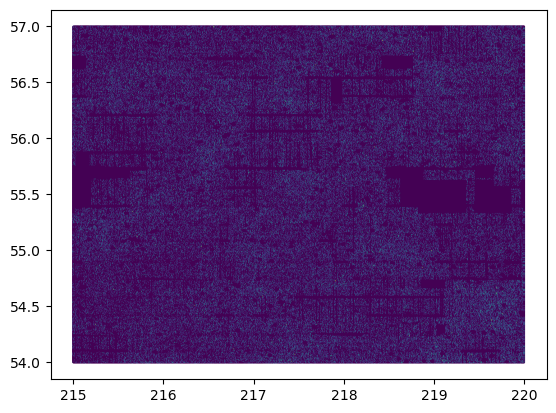

In [32]:
plt.hexbin(ddm3["XWIN_WORLD"], ddm3["YWIN_WORLD"], gridsize=1000)

## 3. Shear calibration

For the shear calibration we use metacalibration.

### Compute calibration quantities

#### Multiplicative bias: shear response matrix

Remember the relation between observed galaxy ellipticity $\epsilon^{\rm obs}$ and shear $\gamma^{\rm true}$.

$$ \left\langle \epsilon^{\rm obs}\right\rangle = \left\langle R \right\rangle \gamma^{\rm true} + \left\langle c \right\rangle.$$

The shear response $R$ is the linear multiplicative shear bias. It 
can be interpreted as derivative of the observed ellipticit with respect to the shear, for a given galaxy:

$$R_{ij} = \frac{\partial \epsilon^{\rm obs}_i}{\partial \gamma^{\rm true}_j}.$$

In practise these derivatives are computed with finite differences, using galaxy images sheared articially by a small amount.

$$R_{ij} \approx \frac{\epsilon^{\rm obs}_i(+\Delta \gamma_j) - \epsilon^{\rm obs}_i(-\Delta \gamma_j)}{ 2 \Delta \gamma_j}.$$


The measured galaxy ellipticities of the sheared images are in the catalogue. The small shear is $\Delta \gamma = 0.01$.

In [99]:
# The columns of the measured ellipticity for metacalibration are as follows:

# 'NGMIX_ELL_1P': sheared by + Delta gamma
# 'NGMIX_ELL_1M': sheared by - Delta gamma
# 'NGMIX_ELL_2P': sheared by + Delta gamma
# 'NGMIX_ELL_2M': sheared by - Delta gamma

# These columns are arrays with two components, i.e.
# dd['NGMIX_ELL_1P'][:, 0] : epsilon_1
# dd['NGMIX_ELL_1P'][:, 1] : epsilon_2

# Excercise 3.1: Compute all four matrix elements for all galaxies.
# Excercise 3.2:
# a) Compute the mean of each element (average over all galaxies).
# b) Create a 2x2 matrix of those mean values.

# You should get diagonal elements of around 0.55, and off-diagonal elements close to zero. 

dg = 0.01

R11 = (ddm3['NGMIX_ELL_1P'][:, 0] - ddm3['NGMIX_ELL_1M'][:, 0]) / ( 2 * dg)
R22 = (ddm3['NGMIX_ELL_2P'][:, 1] - ddm3['NGMIX_ELL_2M'][:, 1]) / ( 2 * dg)
R12 = (ddm3['NGMIX_ELL_2P'][:, 0] - ddm3['NGMIX_ELL_2M'][:, 0]) / ( 2 * dg)                                                                   
R21 = (ddm3['NGMIX_ELL_1P'][:, 1] - ddm3['NGMIX_ELL_1M'][:, 1]) / ( 2 * dg)                                                                   

0.001921105916219782

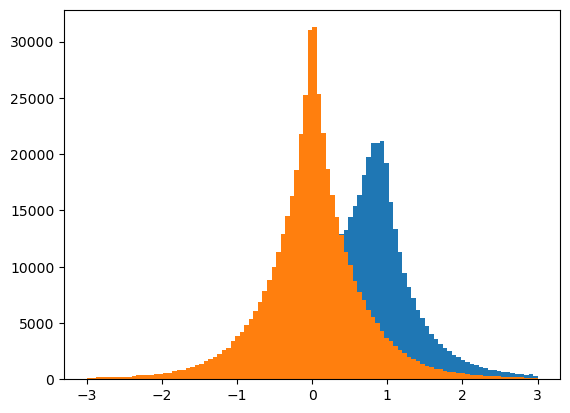

In [49]:
# Excercise 3.3 (optional): Plot distribution of the shear response matrix elements.
_ = plt.hist(R11, bins=100, range=(-3, 3))
_ = plt.hist(R12, bins=100, range=(-3, 3))

#### Additive shear bias

The additive term is computed indepependent of the metacal shear response.

In [55]:
c1 = np.mean(ddm3["NGMIX_ELL_NOSHEAR"][:,0])
c2 = np.mean(ddm3["NGMIX_ELL_NOSHEAR"][:,1])

print(c1, c2)

-0.0010137699382366987 0.00020202017229616705


The additive shear bias is estimated as the mean galaxy ellipticity, assuming that the mean shear is zero. This
is over a fairly good assumption since we average over a large area. Thus,

$$c = \left\langle \epsilon^{\rm obs}\right\rangle.$$

In [ ]:
# Excercise 3.4: Compute the two components of $c$.

### Calibrate

We can apply the estimated multiplicative and additive biases to *calibrate the observed galaxy ellipticities,
and to obtain de-biased shear estimates.

For that we invert the above equation to solve for $\gamma^{\rm true}$. For each galaxy we compute:


$$\gamma^{\rm true} = \left\langle R \right\rangle^{-1} \left(
    \epsilon^{\rm obs} - \left\langle c \right\rangle
    \right).$$

In [61]:
Rall = np.array([[R11, R12], [R21, R11]])

In [63]:
R = np.mean(Rall, axis=2)
c = np.array([c1, c2])

In [68]:
eobs_minus_c = ddm3['NGMIX_ELL_NOSHEAR'] - c
Rm1 = np.linalg.inv(R)

g_cal = Rm1.dot(eobs_minus_c.transpose())

In [78]:
g_cal[:5][0]

array([-0.03516077, -0.9875472 ,  0.51014395, ..., -0.06311257,
        0.39905131,  0.87400123])

In [79]:
ddm3['NGMIX_ELL_NOSHEAR'][0:5, 0]

array([-0.02081291, -0.55398751,  0.28461221,  0.29142884, -0.0120401 ])

In [ ]:
# Excercise 3.5: Compute the calibrated shear for the W3 galaxy sample.

# Now the galaxy catalogue is ready to be used for science!

## 4. Cluster lensing

Compute the tangential shear distortion profile around Planck clusters.

In [82]:
# First, we extract a suitable cluster catalogue.

# Read Planck cluster file
cluster_cat_name = 'HFI_PCCS_SZ-union_R2.08.fits.gz'
cluster_cat = fits.getdata(cluster_cat_name)
cl = cluster_cat

In [114]:
# Exercise 4.1: Select viable clusters in W3. Use the flags
# - "MSZ" != 0 (SZ mass measured)
# - "COSMO" != 0 (good for cosmology)

# and select clusters in W3 footprint. Be conservative with the cuts,
# we do not necessarily want clusters at the very edge of the field.

# and apply to sample. You should have four clusters left.

mask_cl = (
    (cl['MSZ'] != 0)
    & (cl['COSMO'] == True)
)
#    & (cl["RA"] > 215)
#    & (cl["RA"] < 220)
#    & (cl["Dec"] > 54)
#    & (cl["Dec"] < 57)
#)

clm = cl[mask_cl]

print(f"{len(clm)} clusters in W3 found")

492 clusters in W3 found


In [87]:
# We have not considered weak-lensing weights. They are not necessary, but
# can help to boost weak-lensing correlations by down-weighting noisy galaxies
# with uncertain shape measurements.

# Exercise 4.2 (optional): Compute weights for all galaxies.
# Cii = dd3m["NGMIX_ELL_ERR_NOSHEAR"][:, i] for i=0, 1
# w = 1 / (2 * sigma_eps ** 2 + C00 + C11) 

# Alternatively set all weights to 1:
w = np.ones_like(ddm3["XWIN_WORLD"])

In [88]:
# Exercise 4.3: Cluster lensing.
# a) Compute the lensing - cluster cross-correlation.
# b) Plot the tangential and cross-component with error bars

# It is easy to use treecorr to compute cluster lensing cross-correlations.
import treecorr

# The following steps are required.
# 1) Set up a catalogue objects for UNIONS lensing (background) and
#    Planck cluster positions (foreground) using treecorr.Catalog().
# 2) Set up the configuration dictionary and create the cross-correlation
#    instance with treecorr.NGCorrelation().
# 2) Run the correlation process using the class method process().

# Alternatively, the tangential and cross-shear around clusters can be computed "by
# hand", object by object.

In [118]:
coord_units = "deg"

cat_bg = treecorr.Catalog(                                          
    ra=ddm3["XWIN_WORLD"],                                 
    dec=ddm3["YWIN_WORLD"],                                
    g1=g_cal[0],                                                  
    g2=g_cal[1],                                                  
    w=w,                                                    
    ra_units=coord_units,                                     
    dec_units=coord_units,                                    
) 

# Create cluster catalogue object
cat_fg = treecorr.Catalog(                                          
    ra=clm["RA"],                                 
    dec=clm["Dec"],                                                                                   
    ra_units=coord_units,                                     
    dec_units=coord_units,                                    
)

In [119]:
# b) Set up the configuration dictionary and create the cross-correlation
#    instance with treecorr.NGCorrelation().

# Create config object
sep_units = "arcmin"

TreeCorrConfig = {                                                      
    "ra_units": coord_units,                                      
    "dec_units": coord_units,                                     
    "min_sep": 1,                                               
    "max_sep": 100,                                               
    "sep_units": sep_units,                                       
    "nbins": 20,                                   
}

In [120]:
# Create number-shear correlation instance
ng = treecorr.NGCorrelation(TreeCorrConfig)

In [121]:
# Run correlations
ng.process(cat_fg, cat_bg)

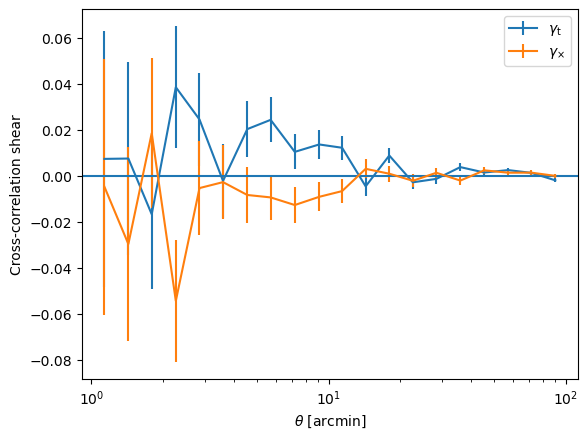

In [122]:
# Attributes in ng:
# angular scale = meanr
# <gamma_t> = xi
# <gamma_x> = xi_im
# variance = varxi

plt.errorbar(ng.meanr, ng.xi, yerr=np.sqrt(ng.varxi), label=r'$\gamma_{\rm t}$')
plt.errorbar(ng.meanr, ng.xi_im, yerr=np.sqrt(ng.varxi), label=r'$\gamma_{\times}$')
plt.xlabel(r"$\theta$ [arcmin]")
plt.ylabel(r"Cross-correlation shear")
plt.axhline(y=0)
plt.xscale("log")
plt.legend()

# 5. PSF systematic diagnostics (optional)

We can compute galaxy - PSF cross-correlation and leakage relations to quantify the influence of
PSF (residuals) on the measured shapes.

## 5.1. Galaxy - PSF cross-correlation function.

$\xi^{\rm sys}$ is defined as the normalised cross-correlation function of galaxy and PST ellipticities:
$$                                                                            
\xi^{\rm sys}_\pm(\theta) = \frac{\left( \xi_{\pm}^{\rm obs, PSF}(\theta) \right)^2}{\xi_{\pm}^{\rm PSF,  PSF}(\theta)}.
$$

This function quantifies the galaxy - PSF cross-correlation. It is normalised such that it can be compared to the cosmological galaxy shear two-point correlation function $\xi_+$; the goal is $|\xi_{\rm sys}| \ll |\xi_+|$. However this is a rather ad-hoc comparison and not phyically well-motivated; see also 5.3. 

In [123]:
# First, load the star and PSF catalogue unions_shapepipe_psf_2022_v1.0.2.fits.

d_star = fits.getdata("unions_shapepipe_psf_2022_v1.0.2.fits")

print(d_star.dtype.names)

# The ellipticity measurements were performed with the "HSM" (Hirata & Seljak 2003,
# https://ui.adsabs.harvard.edu/abs/2003MNRAS.343..459H/abstract and Mandelbaum et al. 2005,
# https://ui.adsabs.harvard.edu/abs/2005MNRAS.361.1287M/abstract) shape method,
# implemented in the library galsim.

# The catalogue contains the ellipticity for stars (E1_STAR_HSM, E2_STAR_HSM) and the PSF at the star
# positions (E1_PSF_HSM, E2_PSF_HSM).

('X', 'Y', 'RA', 'DEC', 'E1_PSF_HSM', 'E2_PSF_HSM', 'SIGMA_PSF_HSM', 'E1_STAR_HSM', 'E2_STAR_HSM', 'SIGMA_STAR_HSM', 'FLAG_PSF_HSM', 'FLAG_STAR_HSM', 'CCD_NB')


In [125]:
# Excercise 5.1 (optional):
# a) Compute xi_sys) 

# As before, use treecorr. This time, we need two shear catalogue objects, one for galaxies
# and one for the PSF. We can re-use the galaxy catalogue from before.) 

# The correlation instances are created via treecorr.GGCorrelation().
# The "xi_+" correlation function component is the class variable "xip".

# b) Compute the galaxy shear two-point correlation function and compare to xi_sys.

# c) As a bonus, calculate the error bars for xi_sys using error propagation of the individual correlation
# functions.

w_star = np.ones_like(d_star["RA"])

cat_star = treecorr.Catalog(                                          
    ra=d_star["RA"],                                 
    dec=d_star["DEC"],                                
    g1=d_star["E1_PSF_HSM"],                                                  
    g2=d_star["E2_PSF_HSM"],                                        
    w=w_star,                                                    
    ra_units=coord_units,                                     
    dec_units=coord_units,                                    
) 

In [126]:
gg = treecorr.GGCorrelation(TreeCorrConfig)

In [ ]:
gg.process(cat_bg, cat_star)

## 5.2 Object-wise PSF leakage

We defined the PSF leakage as an additional (linear) contribution of the PSF ellipticity to the galaxy shape.
Ignoring the shear, this corresponds to the matrix equation

$$
\mathbf\varepsilon^{\textrm{obs}}                                               
    = \mathbf{\alpha} \mathbf \varepsilon^{\textrm{PSF}}                               
      + \mathbf c .
$$

The leakage coefficient $\mathbf \alpha$ can be obtained by linear regression.

In [ ]:
# Excercise 5.2 (optional): Compute object-wise PSF leakage

# First, for simplicity, we can fit one component at a time and neglect the spin consistency. So we
# perform four independent fits of
# eps^obs_i = alpha_ij eps^PSF_j + c_j
# for i, j = 1, 2.

## 5.3 Scale-dependent PSF leakage

If we multiply the above equation $\mathbf\varepsilon^{\textrm{obs}}                                               = \mathbf{\alpha} \mathbf \varepsilon^{\textrm{PSF}}                               
      + \mathbf c$ with $\varepsilon^{\textrm{PSF}, \ast}$, take the expectation value and solve for $\alpha$, we find

$$
\alpha(\theta) = \frac{\xi_{+}^{\mathrm{obs, PSF}}(\theta) - \langle e^{\mathrm{obs}} \rangle^{*} \langle e^{\mathrm{PSF}} \rangle}{\xi_{+}^{\mathrm{PSF, PSF}}(\theta)},
$$

This is a similar equation to $\xi_{\rm sys}$, but it is directly derived from the (linear) PSF leakage model.

Acceptable values are typically up to a few percent.

In [ ]:
# Excercise 5.3 (optional): Compute and plot the scale-dependent PSF leakage function alpha(theta)

# Re-use the treecorr objects from above.

# Bonus: Compute and plot the errorbars.